# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Getting the Dataset

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Getting Info about Dataset

In [3]:
# Getting shape of the datset
df.shape

(9994, 13)

In [4]:
# Getting column names
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
# Getting information about columns like their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# checking null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
# Gettting Description of the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# Getting number of unique values of each column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
# Dropping Postal code column
df = df.drop(['Postal Code'],axis=1)

# Exploratory Data Analysis

## Using PairPlot to find relations in dataset

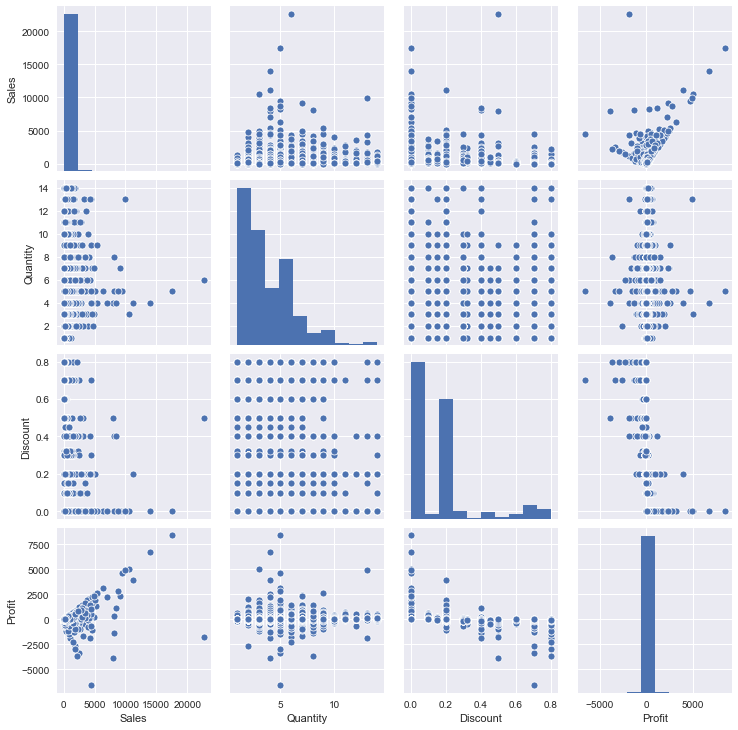

In [10]:
sns.pairplot(df)

 ## Ship Mode VS Segment

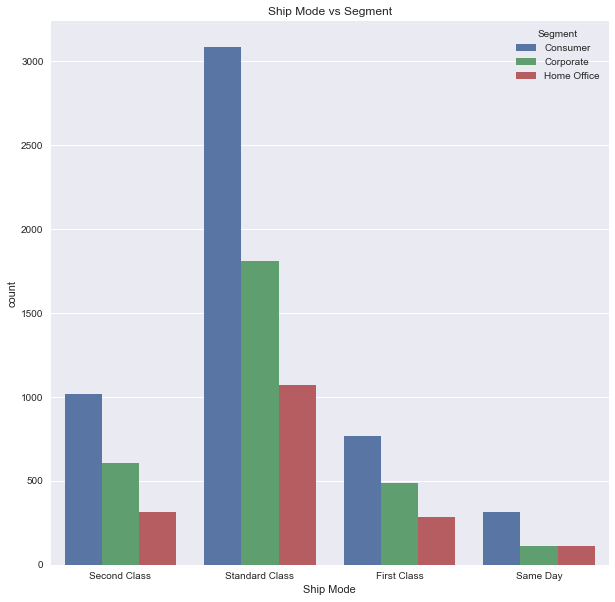

In [11]:
plt.figure(figsize=(10, 10))
sns.countplot(x = 'Ship Mode',hue='Segment',data= df)
plt.title('Ship Mode vs Segment')
plt.show()

## Segment VS Category

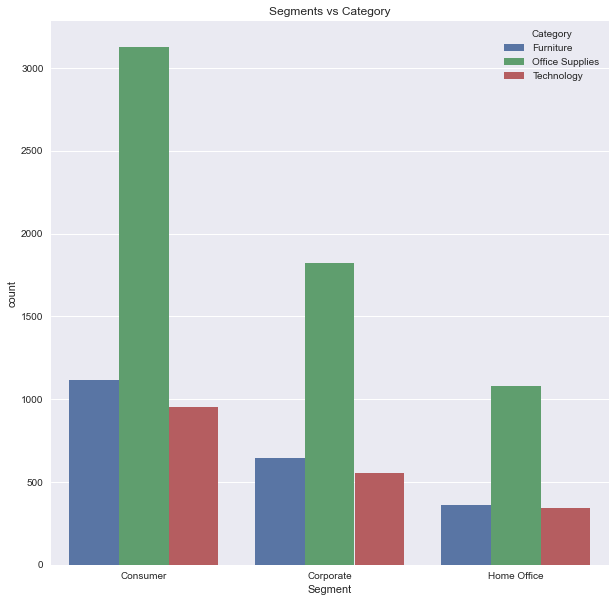

In [12]:
plt.figure(figsize=(10, 10))
sns.countplot(x = 'Segment',hue='Category',data= df)
plt.title('Segments vs Category')
plt.show()

## Region VS Category

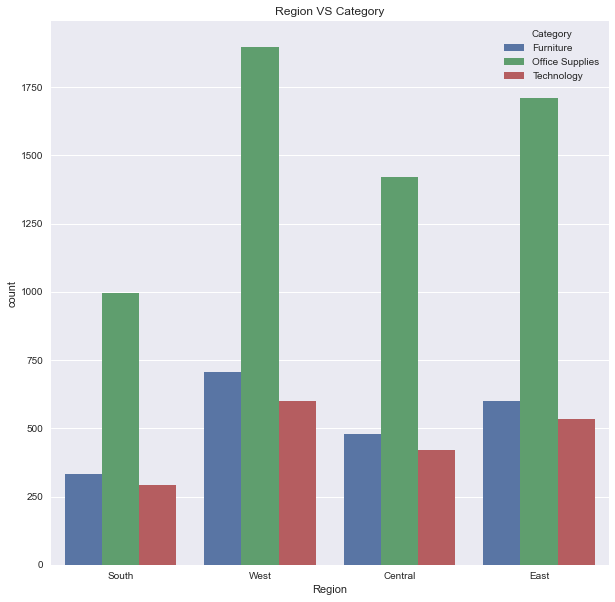

In [13]:
plt.figure(figsize=(10, 10))
sns.countplot(x = 'Region',hue='Category',data= df)
plt.title('Region VS Category')
plt.show()

## Category VS Sales

Text(0.5, 1.0, 'Category VS Sales')

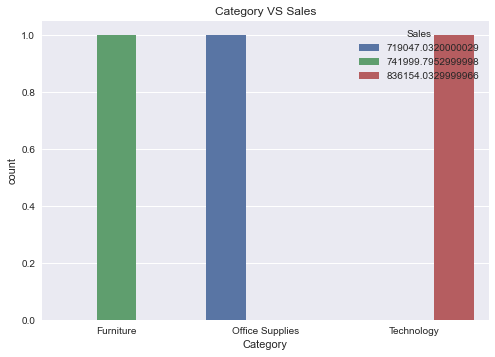

In [14]:
data = df.groupby(["Category"]).Sales.sum().reset_index()
sns.countplot(x = 'Category',hue='Sales',data= data)
plt.title('Category VS Sales')

## Region VS Sales

Text(0.5, 1.0, 'Region VS Sales')

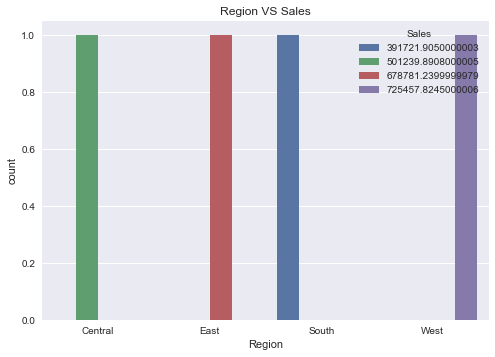

In [15]:
data = df.groupby(["Region"]).Sales.sum().reset_index()
sns.countplot(x = 'Region',hue='Sales',data= data)
plt.title('Region VS Sales')

## Category VS Profit

Text(0.5, 1.0, 'Category VS Profit')

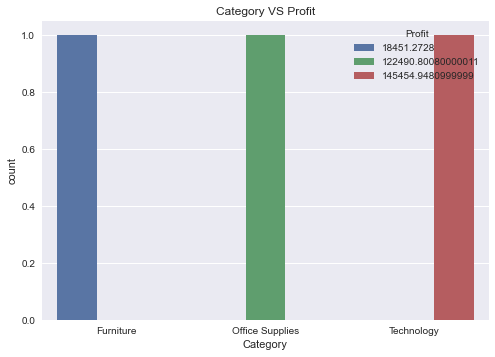

In [16]:
data = df.groupby(["Category"]).Profit.sum().reset_index()
sns.countplot(x = 'Category',hue='Profit',data= data)
plt.title('Category VS Profit')

## Region VS Profit

Text(0.5, 1.0, 'Region VS Profit')

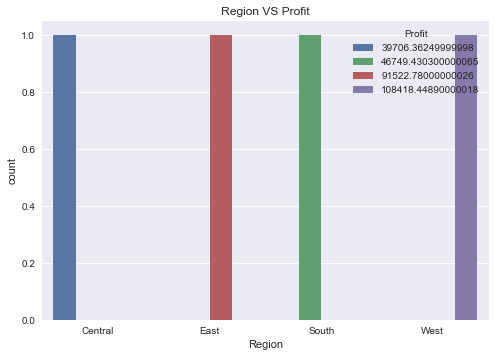

In [17]:
data = df.groupby(["Region"]).Profit.sum().reset_index()
sns.countplot(x = 'Region',hue='Profit',data= data)
plt.title('Region VS Profit')

## Sales/Profit VS Category

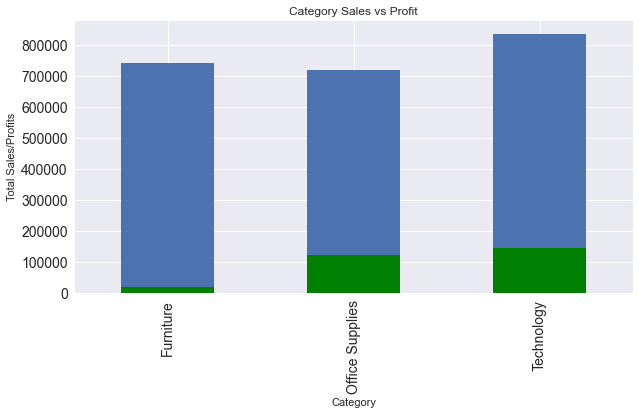

In [18]:
data = df.groupby(["Category"]).Sales.sum()
data2 = df.groupby(["Category"]).Profit.sum()
data.plot(kind='bar',figsize = (10,5),fontsize = 14)
data2.plot(kind='bar',figsize = (10,5),fontsize = 14,color='green')
plt.xlabel('Category')
plt.ylabel('Total Sales/Profits')
plt.title("Category Sales vs Profit")
plt.show()

## Sales/Profit VS Segment

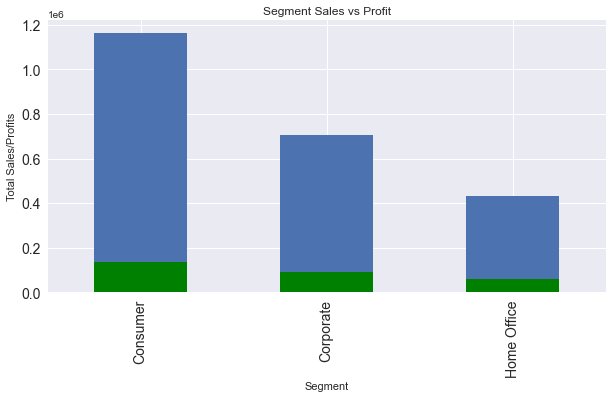

In [19]:
data = df.groupby(["Segment"]).Sales.sum()
data2 = df.groupby(["Segment"]).Profit.sum()
data.plot(kind='bar',figsize = (10,5),fontsize = 14)
data2.plot(kind='bar',figsize = (10,5),fontsize = 14,color='green')
plt.xlabel('Segment')
plt.ylabel('Total Sales/Profits')
plt.title("Segment Sales vs Profit")
plt.show()

## Sales/Profit VS Region

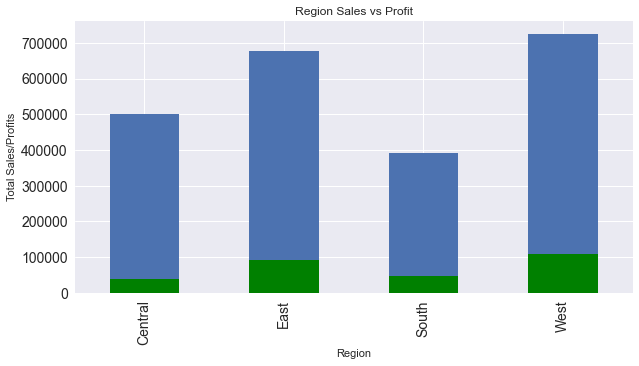

In [20]:
data = df.groupby(["Region"]).Sales.sum()
data2 = df.groupby(["Region"]).Profit.sum()
data.plot(kind='bar',figsize = (10,5),fontsize = 14)
data2.plot(kind='bar',figsize = (10,5),fontsize = 14,color='green')
plt.xlabel('Region')
plt.ylabel('Total Sales/Profits')
plt.title("Region Sales vs Profit")
plt.show()

## Segment VS Sub-Category

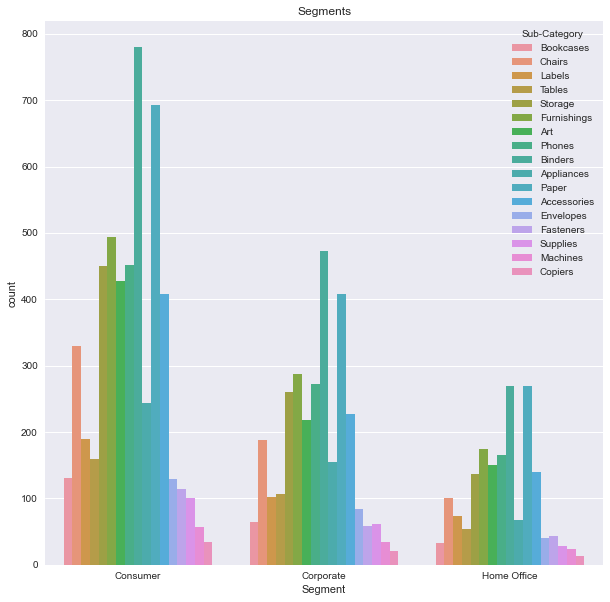

In [21]:
plt.figure(figsize=(10, 10))
sns.countplot(x = 'Segment',hue='Sub-Category',data= df)
plt.title('Segments')
plt.show()

## Sales/Profit VS Sub-Category

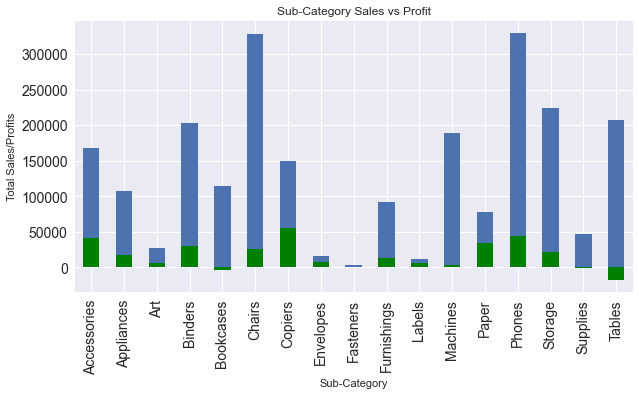

In [22]:
data = df.groupby(["Sub-Category"]).Sales.sum()
data2 = df.groupby(["Sub-Category"]).Profit.sum()
data.plot(kind='bar',figsize = (10,5),fontsize = 14)
data2.plot(kind='bar',figsize = (10,5),fontsize = 14,color='green')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales/Profits')
plt.title("Sub-Category Sales vs Profit")
plt.show()

## Profit/Discount  VS Sub-Categor

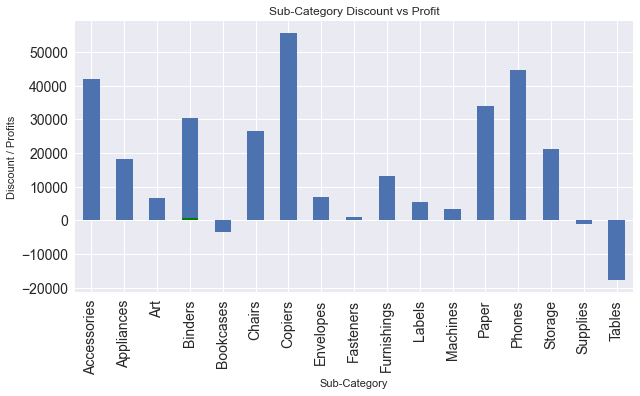

In [23]:
data = df.groupby(["Sub-Category"]).Profit.sum()
data2 = df.groupby(["Sub-Category"]).Discount.sum()
data.plot(kind='bar',figsize = (10,5),fontsize = 14)
data2.plot(kind='bar',figsize = (10,5),fontsize = 14,color='green')
plt.xlabel('Sub-Category')
plt.ylabel('Discount / Profits')
plt.title("Sub-Category Discount vs Profit")
plt.show()

## Discount VS Profit

Text(0.5, 1.0, 'Discount VS Profit')

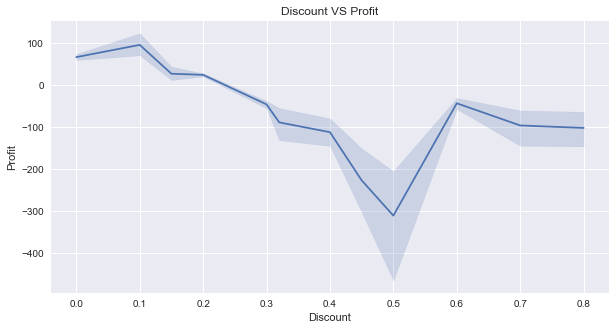

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Discount',y='Profit',data=df)
plt.title("Discount VS Profit")

## Discount VS Sales

Text(0.5, 1.0, 'Discount VS Sales')

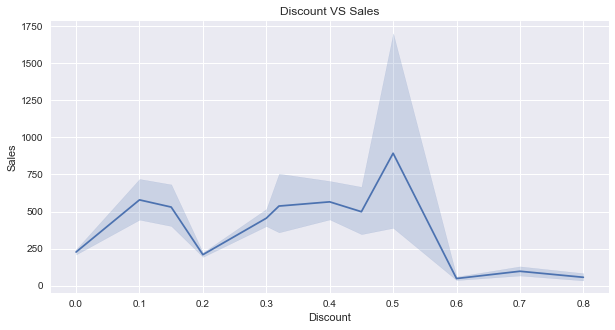

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Discount',y='Sales',data=df)
plt.title('Discount VS Sales')

## Quantity VS Discount

Text(0.5, 1.0, 'Quantity VS Discount')

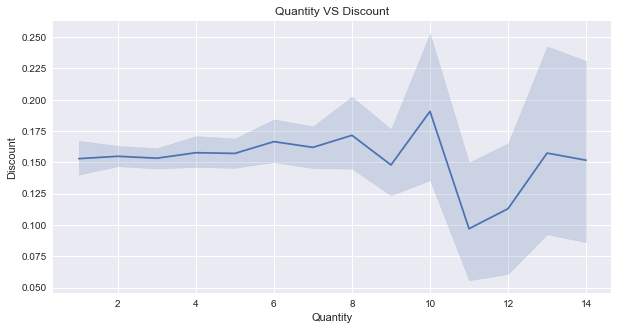

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Quantity',y='Discount',data=df)
plt.title('Quantity VS Discount')

## Quantity VS Profit

Text(0.5, 1.0, 'Quantity Vs Profit')

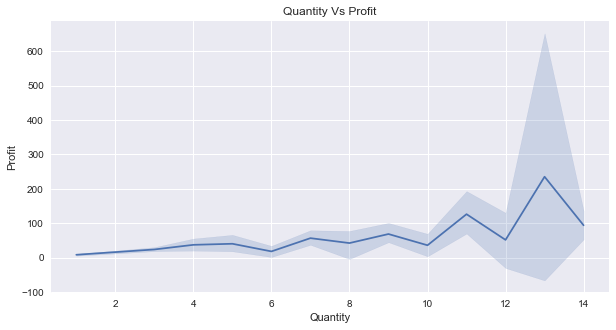

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Quantity',y='Profit',data=df)
plt.title('Quantity Vs Profit')

# Conclusion

- **Standard Class** Ship mode is the most preffered shipping mode by all the three segments

- **Office Supplies** is the most ordered category by all the three segments. Also by **region** Analysis office supplies are more preferred

- **Technology** is least bought category, Hence more focus should be given to technology sector and it can provide more sales then furniture sector

- **West region** has placed most orders from all the four regions and has highest sales. 

- But **South region** has minimum number of orders , Hence more marketing should be done in the south region and less in west region.

- **Technology** Sector has highest profit but has lowest sales , Hence more focus should be on Technology Sector.

- **Centeral** region has lowest profit , so more schemes and focus should be given at centeral region to maximize profit.

- **Consumer** Sector has maximum sales and profit.

- whereas **Sub-Categories like machine and copries** should be given for more focus.

- For **Discount**, If more discount is given sales increases but profit decreases